#### DATA 622 - Homework 1

- Are the columns of your data correlated?
- Are there labels in your data? Did that impact your choice of algorithm?
- What are the pros and cons of each algorithm you selected?
- How your choice of algorithm relates to the datasets (was your choice of algorithm impacted by the datasets you chose)?
- Which result will you trust if you need to make a business decision?
- Do you think an analysis could be prone to errors when using too much data, or when using the least amount possible?
- How does the analysis between data sets compare?


#### Datasets

For this assignment, I used the following datasets from Kaggle:

1. [Coursera Data](https://www.kaggle.com/datasets/elvinrustam/coursera-dataset?resource=download)
2. [Loan Default Prediction](https://www.kaggle.com/datasets/hemanthsai7/loandefault)


### **A. Setup**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [3]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)

##### Import data

In [4]:
df1 = pd.read_csv('data/CourseraDataset-Clean.csv')
df2 = pd.read_csv('data/train.csv')

### **B. Coursera Data**

This dataset represents courses that are offered by Coursera. While the data represents the specific program catalog of Coursera, we can 


This dataset could be considered to be a medium sized dataset. It has 8K rows and only 13 different features. 


In [ ]:
df1.shape

(8370, 13)


There are a number of values in the dataset that are identifiers for an individual course and thus not something that we are able to infer to much meaning from with respect to the overall dataset. 

These features are:
- Course Title
- What you will learn
- Skill gain
- Modules
- Instructor
- Course URL

Thus, when doing further analysis to understand the dataset, we will remove these features in favor of a simpler dataset that only includes the generalizable feature variables


In [ ]:
df1.head(5)

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582


This dataset consists of both numerical and text based values. Additionally, we see that there are 10 fields that are labeled as object data types and 3 fields that are of numerical type. Overall the dataset is relatively small and is easy to evaluate in Python without having to utilize any additional computational resources.

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Course Title                    8370 non-null   object 
 1   Rating                          8370 non-null   float64
 2   Level                           8370 non-null   object 
 3   Schedule                        8370 non-null   object 
 4   What you will learn             8370 non-null   object 
 5   Skill gain                      8370 non-null   object 
 6   Modules                         8337 non-null   object 
 7   Instructor                      8282 non-null   object 
 8   Offered By                      8370 non-null   object 
 9   Keyword                         8370 non-null   object 
 10  Course Url                      8370 non-null   object 
 11  Duration to complete (Approx.)  8370 non-null   float64
 12  Number of Review                83

Finally, we see for numerical variables, there is a pretty wide distribution amongst the values, with Number of Review and Duration to complete being heavily right-skewed, and Rating being left-skewed

In [178]:
df1.describe()

,Rating,Duration to complete (Approx.),Number of Review
count,8370.000000,8370.000000,8370.000000
mean,4.005974,29.245968,2044.256631
std,1.623430,39.899608,10265.366839
min,0.000000,1.000000,0.000000
25%,4.500000,10.000000,32.000000
50%,4.700000,16.000000,213.000000
75%,4.800000,32.000000,1025.000000
max,5.000000,480.000000,225830.000000


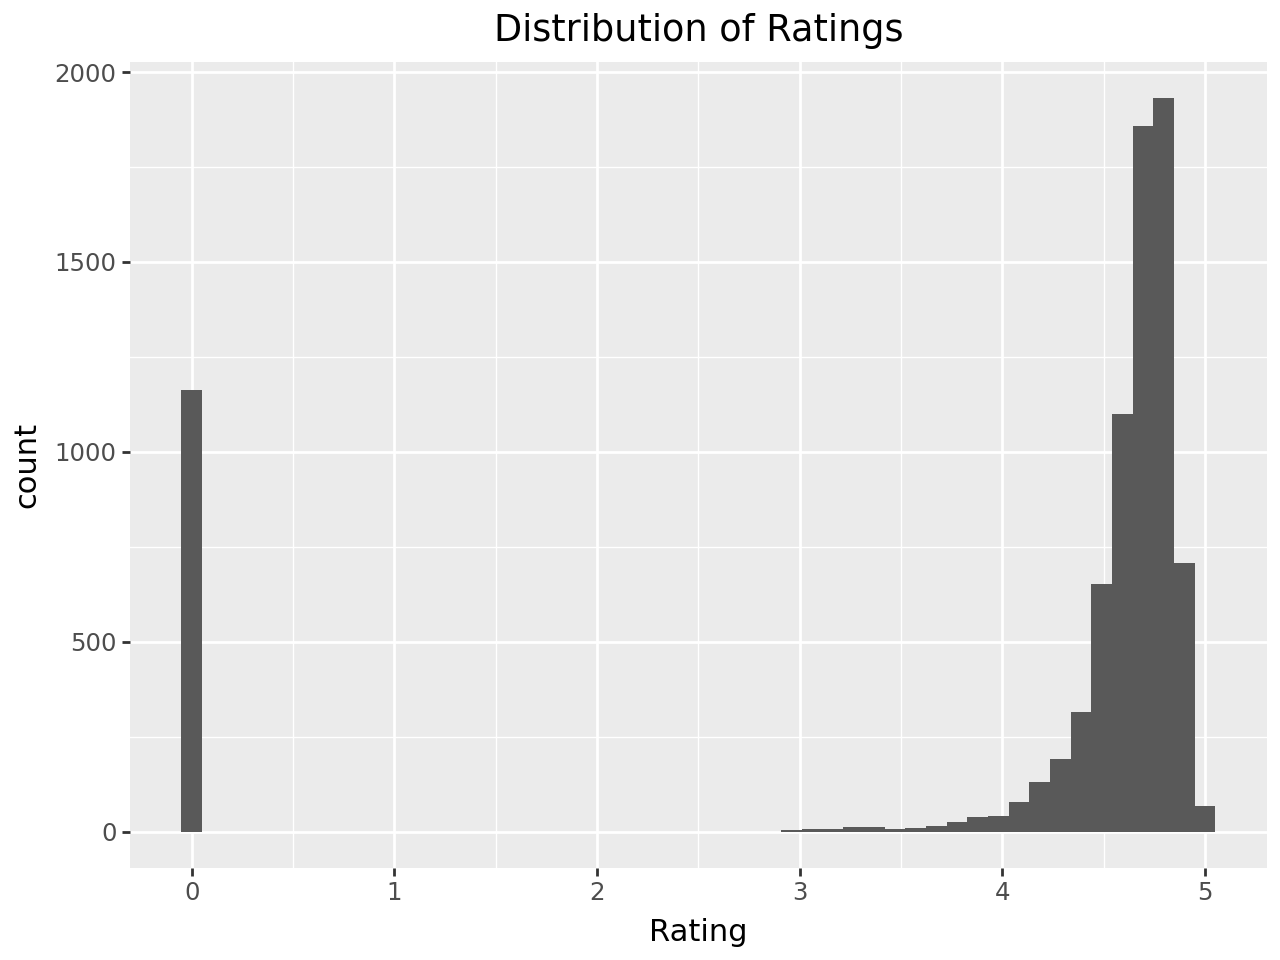

In [184]:
# Distribution of Ratings

(
    ggplot(df1) 
    + aes(x='Rating') 
    + geom_histogram(bins=50)
    + labs(title='Distribution of Ratings')
)


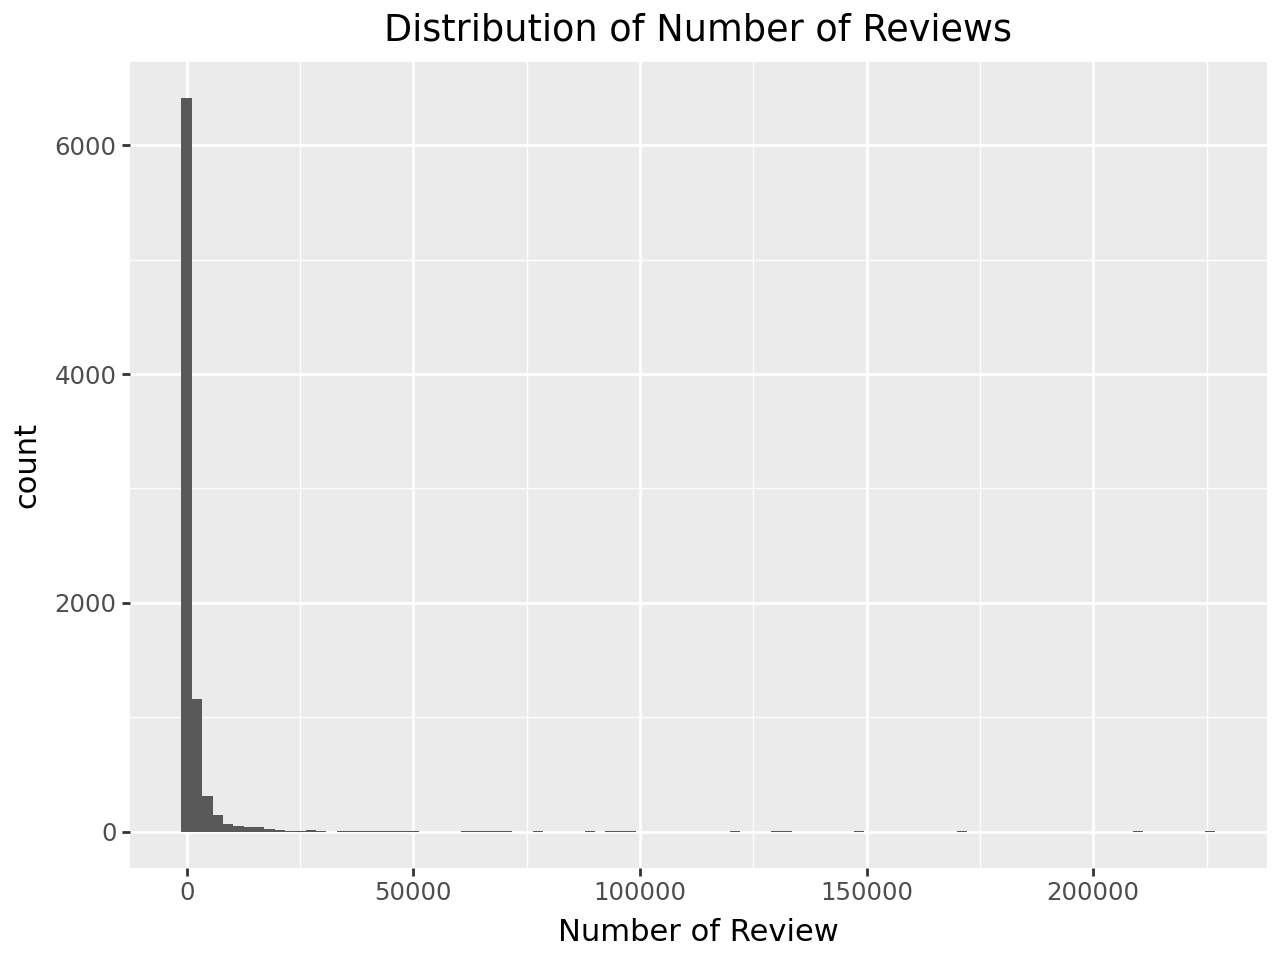

In [185]:
# Distribution of Number of Reviews

(
    ggplot(df1) 
    + aes(x='Number of Review') 
    + geom_histogram(bins=100)
    + labs(title='Distribution of Number of Reviews')
)


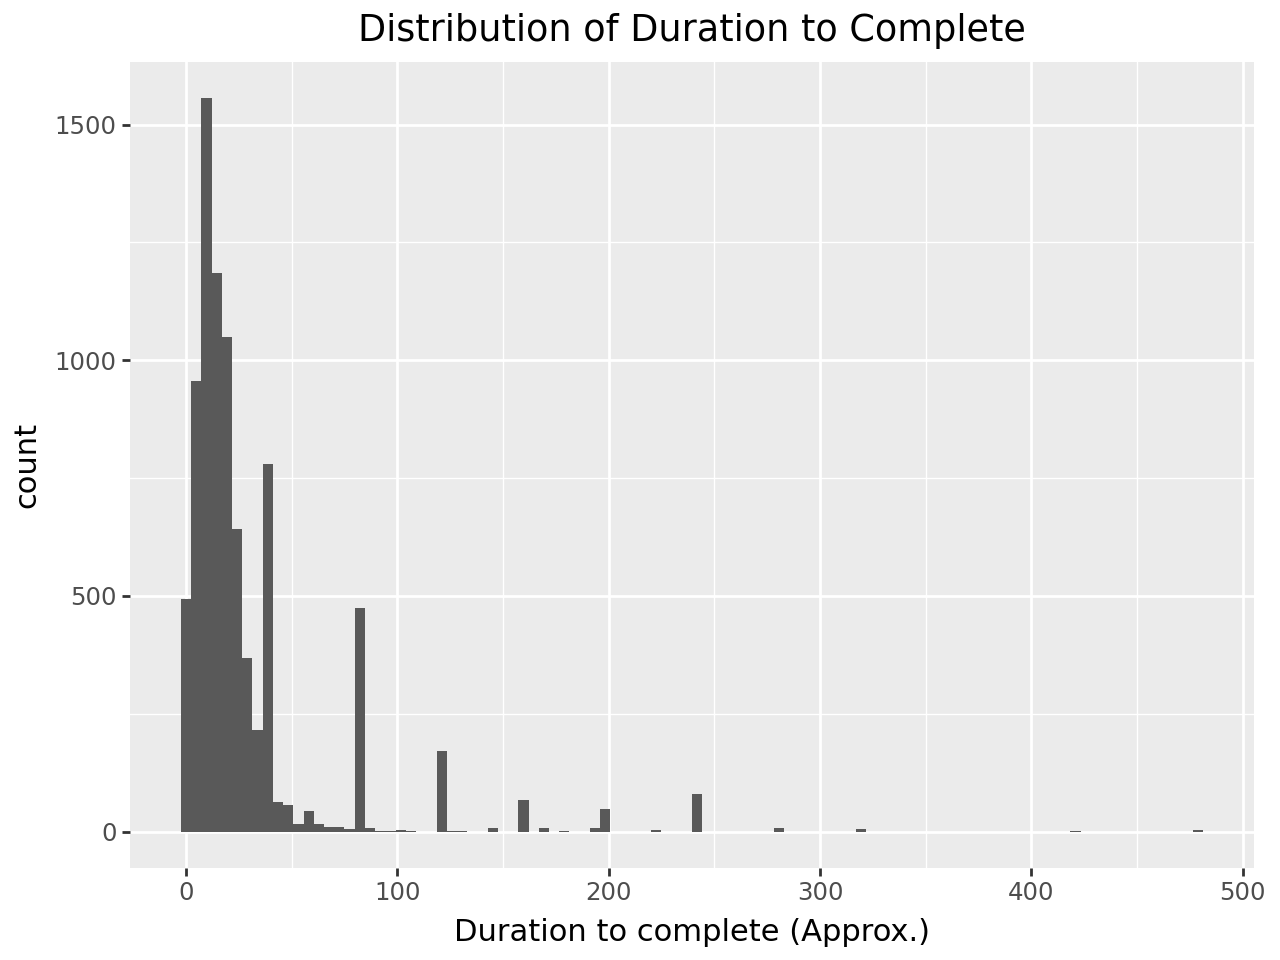

In [186]:
# Distribution of Duraction to Complete

(
    ggplot(df1) 
    + aes(x='Duration to complete (Approx.)') 
    + geom_histogram(bins=100)
    + labs(title='Distribution of Duration to Complete')
)


#### **Exploratory Analysis**

We begin my creating a simpler dataframe that only includes the relevant variables that can be used for gaining a general sense of the coursera dataset

In [188]:
pd.DataFrame(df1.columns)


,0
0,Course Title
1,Rating
2,Level
3,Schedule
4,What you will learn
5,Skill gain
6,Modules
7,Instructor
8,Offered By
9,Keyword


In [193]:
keep_index = [1,2,3,8,9,11,12]

In [546]:
df1_simplified = df1.iloc[:,keep_index]
df1_simplified.head(10)

,Rating,Level,Schedule,Offered By,Keyword,Duration to complete (Approx.),Number of Review
0,4.8,Beginner level,Flexible schedule,The Museum of Modern Art,Arts and Humanities,20.0,2813
1,4.4,Beginner level,Flexible schedule,University of Illinois at Urbana-Champaign,Arts and Humanities,34.0,100
2,4.5,Beginner level,Flexible schedule,Michigan State University,Arts and Humanities,9.0,227
3,0.0,Beginner level,Flexible schedule,SAE Institute México,Arts and Humanities,8.0,0
4,4.8,Beginner level,Flexible schedule,University of Rochester,Arts and Humanities,11.0,582
5,4.6,Beginner level,Flexible schedule,Emory University,Arts and Humanities,5.0,107
6,4.5,Intermediate level,Flexible schedule,Erasmus University Rotterdam,Arts and Humanities,13.0,38
7,0.0,Beginner level,Flexible schedule,Yale University,Arts and Humanities,23.0,0
8,4.9,Intermediate level,Flexible schedule,Curtis Institute of Music,Arts and Humanities,5.0,63
9,4.8,Beginner level,Flexible schedule,Peking University,Arts and Humanities,44.0,39



Some of the questions of interest in exloring the dataset are:

- What are the top 15 institutions based on number of courses offered?
- How many courses does Coursera offer by category type?
- How many courses does the Coursera offer by course level?
- Are there differences in course ratings based on the institution?
- Are there differences in the number of reviews that users provide based on course level?

In [222]:
df1_offered_by = pd.DataFrame(df1_simplified['Offered By'].value_counts()).reset_index()
df1_offered_by['pct_total'] = df1_offered_by.apply(lambda x: x['count']/df1_offered_by['count'].sum(),axis=1)

From the data, we see that the University of Colorado Boulder is the program offering the top number of courses - 408, which represents 4.9% of the total courses offered by Coursera

In [223]:
df1_offered_by.head(15)

,Offered By,count,pct_total
0,University of Colorado Boulder,408,0.048746
1,Google,307,0.036679
2,University of Michigan,294,0.035125
3,IBM,289,0.034528
4,Coursera Project Network,279,0.033333
5,Johns Hopkins University,272,0.032497
6,Google Cloud,225,0.026882
7,University of Pennsylvania,223,0.026643
8,University of Illinois at Urbana-Champaign,200,0.023895
9,University of Colorado System,133,0.015890


In [409]:
top_programs = df1_offered_by.head(15)['Offered By'].tolist()

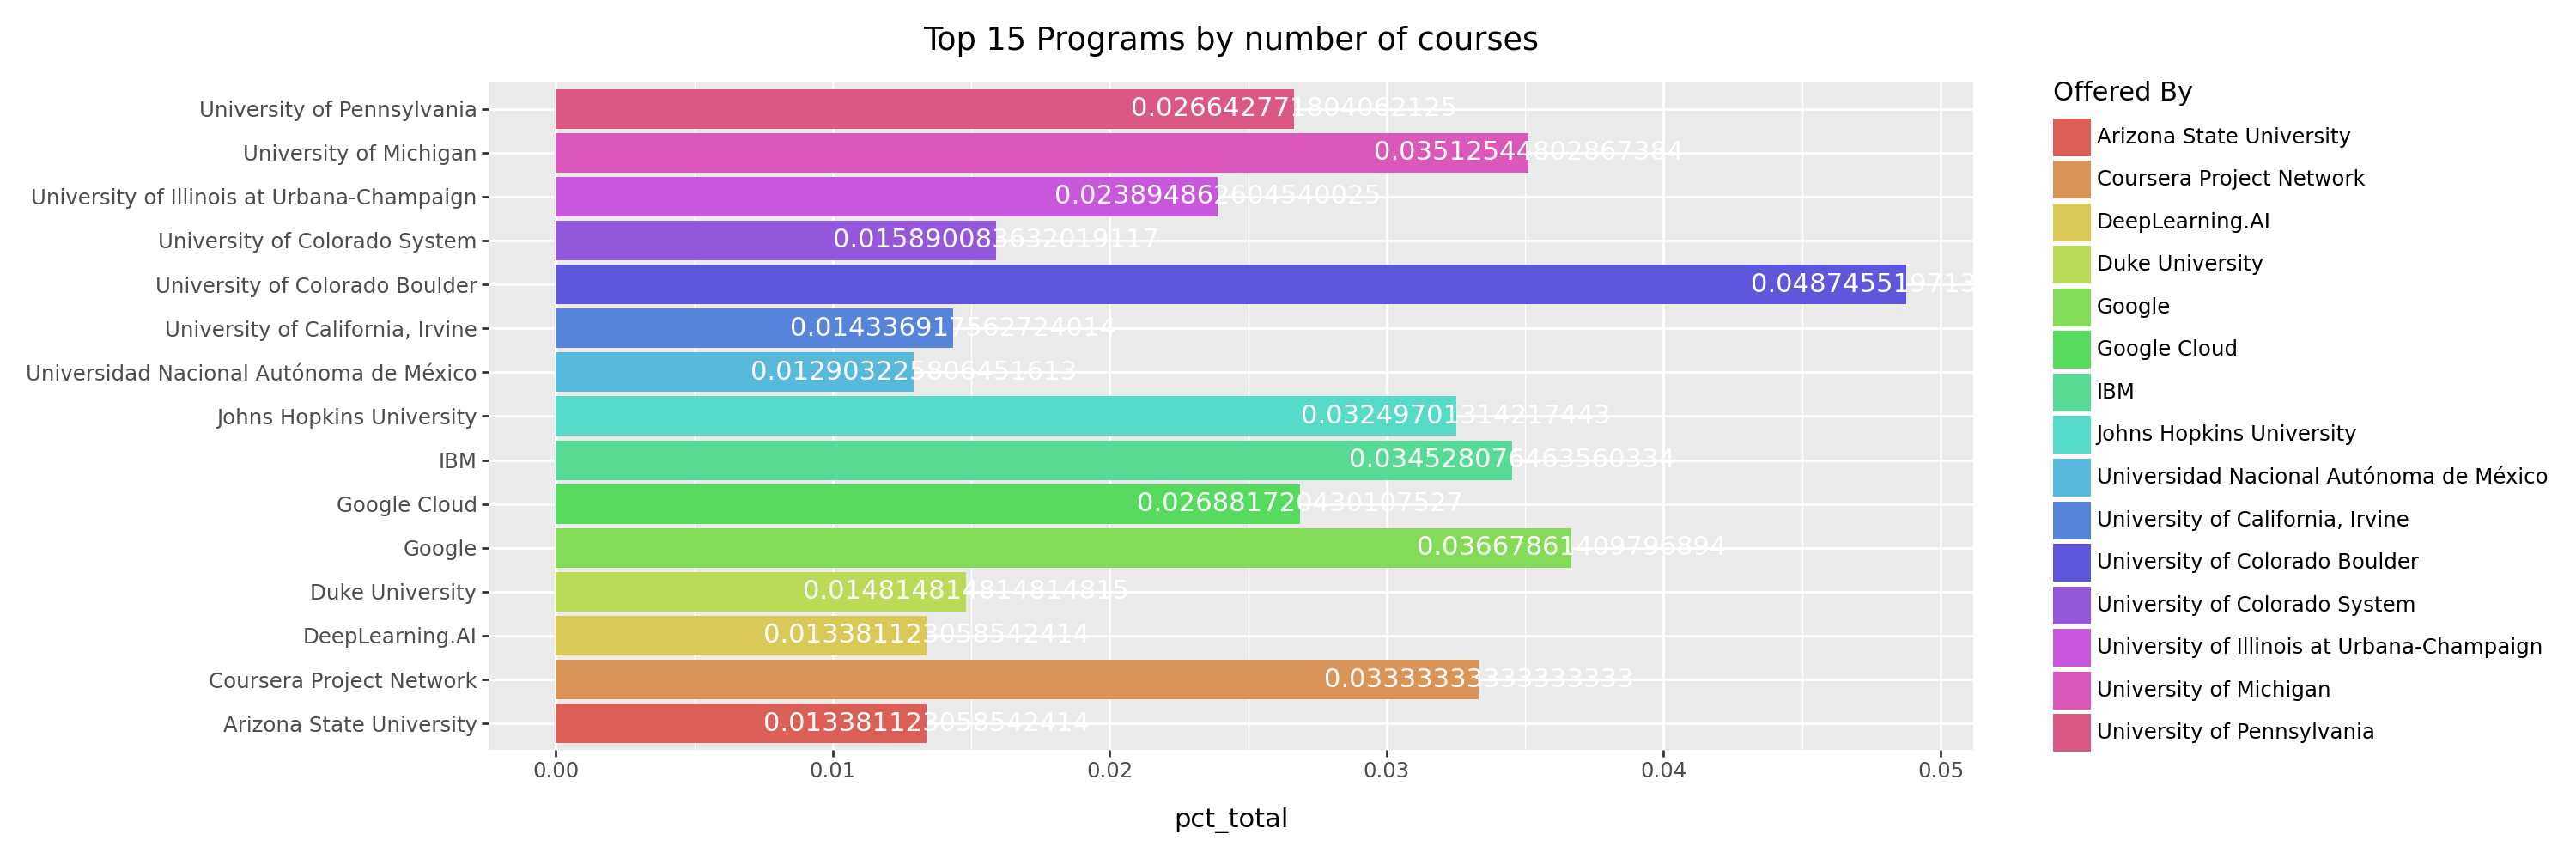

In [227]:
# Plot top 15 courses

(
    ggplot(df1_offered_by.head(15), mapping=aes(x=cats,y='pct_total'))
    + aes(fill='Offered By') 
    + geom_col() 
    + coord_flip() 
    + geom_text(aes(label='pct_total'), color='white') 
    + theme(figure_size=(15,5))
    + labs(title='Top 15 Programs by number of courses')
)


We see from the following table that the top 5 topics for courses are Health, Computer Science, Data Science, Social Sciences and Personal Development

In [239]:
pd.DataFrame(df1_simplified['Keyword'].value_counts()).reset_index()

,Keyword,count
0,Health,986
1,Computer Science,980
2,DataScience,964
3,Social Sciences,962
4,Personal Development,936
5,Business,935
6,Information Technology,852
7,Physical Science and Engineering,799
8,Math and Logic,480
9,Arts and Humanities,476


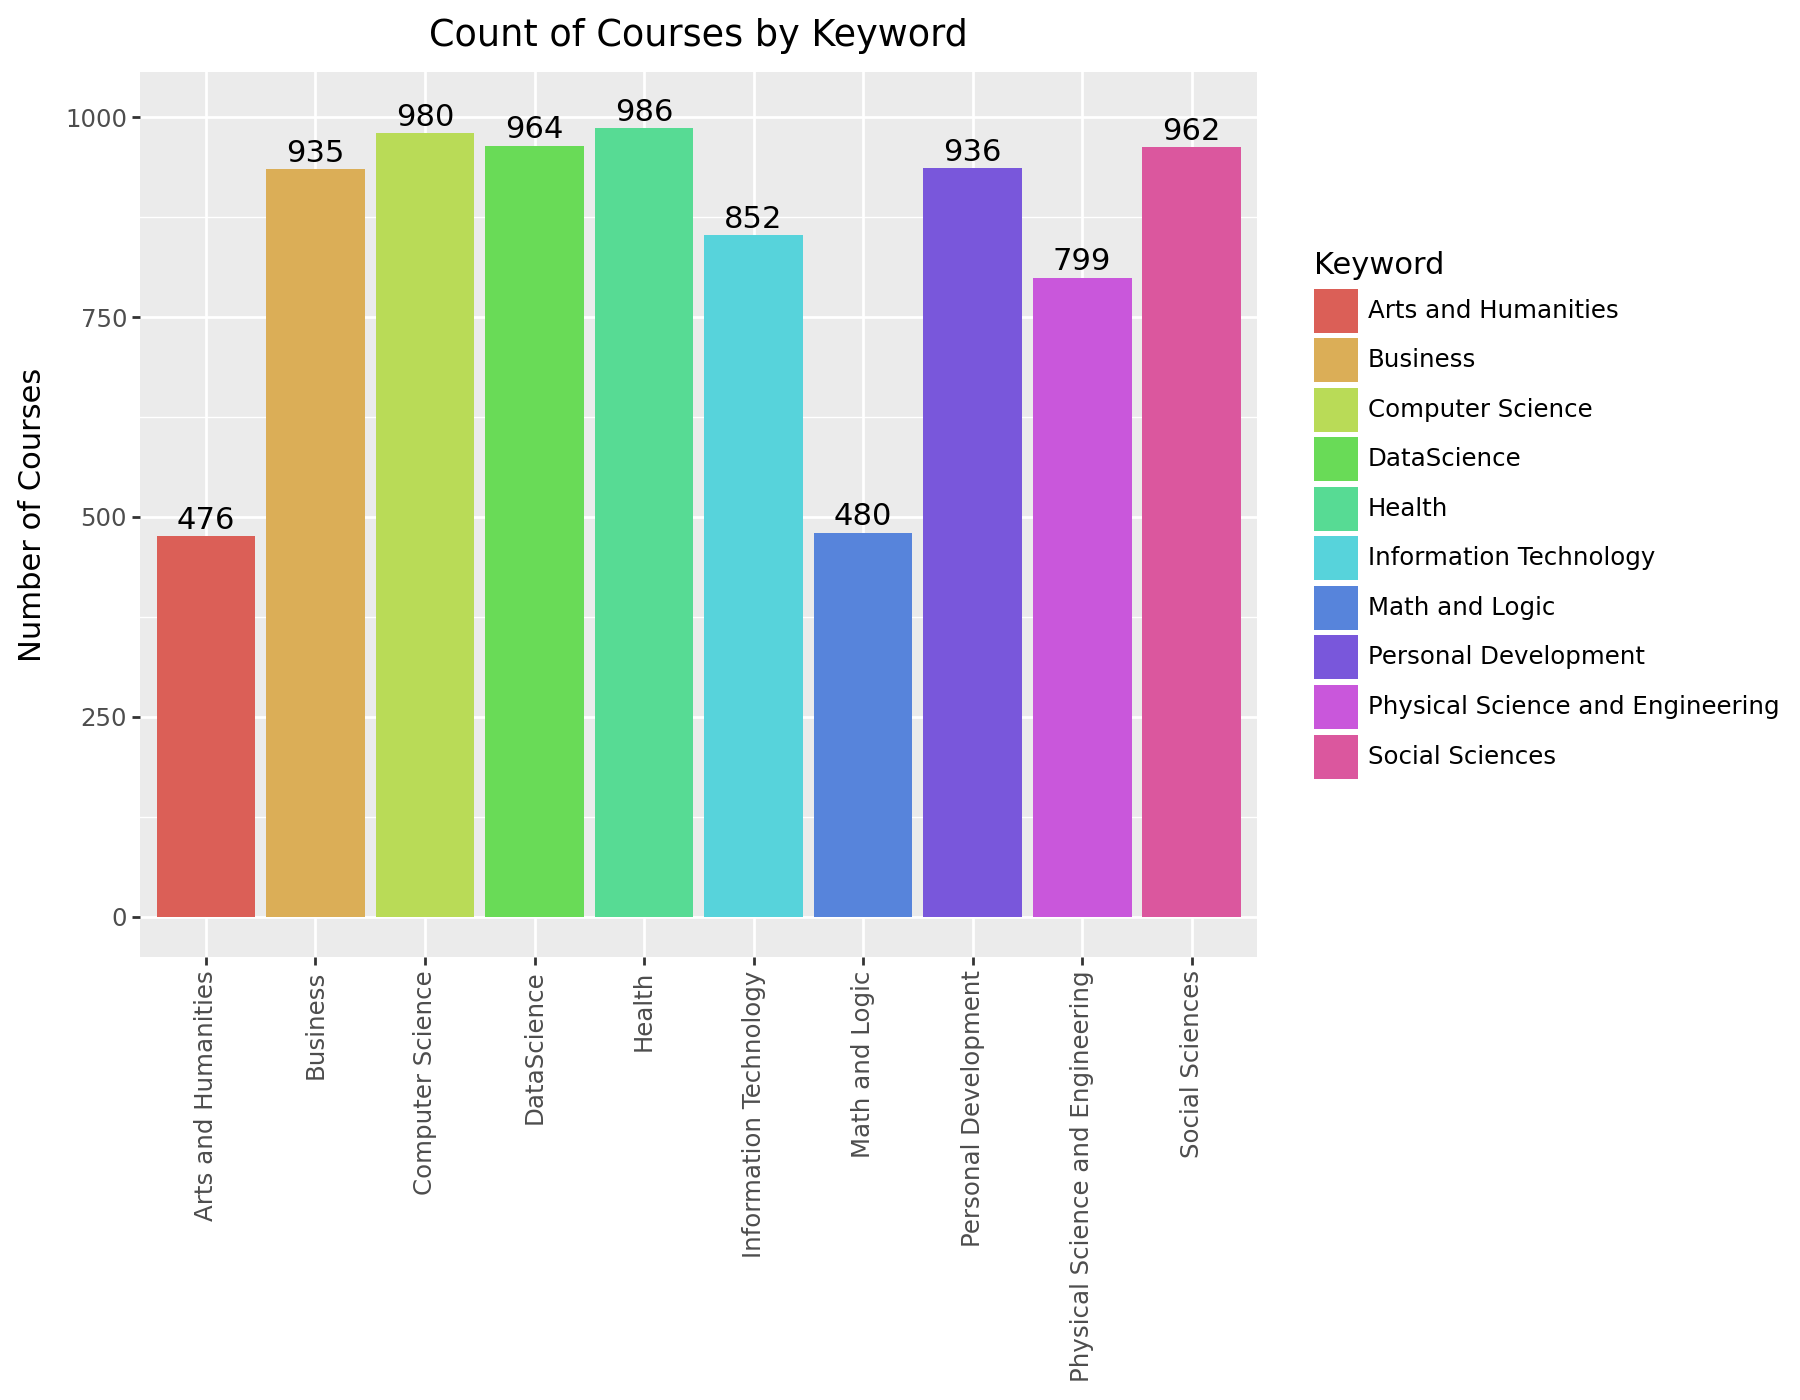

In [229]:
# Courses by Keyword
(
    ggplot(df1) 
    + aes(x='Keyword', fill='Keyword') 
    + geom_bar() 
    + theme(figure_size=(9,7), axis_text_x=element_text(rotation=90))
    + geom_text(aes(label=after_stat('count')),stat='count', nudge_y=20, color='black')
    + labs(title='Count of Courses by Keyword', y='Number of Courses', x="")
)


We can now build a dataframe to allow us to evaluated which of the top institutions offering each of the courses

In [244]:

temp_df = df1_simplified.loc[df1_simplified['Keyword'].isin(['Health','Computer Science', 'DataScience','Personal Development','Social Sciences'])]


In [277]:
temp_df = temp_df.groupby(['Keyword'])['Offered By'].value_counts(ascending=False).reset_index()

In [302]:
temp_pivot = temp_df.pivot_table(index='Offered By', columns='Keyword',fill_value=0, values='count').reset_index()

In [410]:
computer_science = temp_pivot.loc[:,['Offered By','Computer Science']].sort_values(by='Computer Science', ascending=False).reset_index(drop=True)
health = temp_pivot.loc[:,['Offered By','Health']].sort_values(by='Health', ascending=False).reset_index(drop=True)
social_science = temp_pivot.loc[:,['Offered By','Social Sciences']].sort_values(by='Social Sciences', ascending=False).reset_index(drop=True)
data_science = temp_pivot.loc[:,['Offered By','DataScience']].sort_values(by='DataScience', ascending=False).reset_index(drop=True)
personal_development = temp_pivot.loc[:,['Offered By','Personal Development']].sort_values(by='Personal Development', ascending=False).reset_index(drop=True)

In [411]:
computer_science['cs_rank'] = (computer_science.reset_index().index)+1
health['h_rank'] = (health.reset_index().index)+1
social_science['ss_rank'] = (social_science.reset_index().index)+1
data_science['ds_rank'] = (data_science.reset_index().index)+1
personal_development['pd_rank'] = (personal_development.reset_index().index)+1

In [413]:
m1 = pd.merge(computer_science.loc[:,['Offered By','cs_rank']],health.loc[:,['Offered By','h_rank']],how='outer', left_on='Offered By', right_on='Offered By')
m2 = pd.merge(m1,social_science.loc[:,['Offered By','ss_rank']],how='outer', left_on='Offered By', right_on='Offered By')
m3 = pd.merge(m2,personal_development.loc[:,['Offered By','pd_rank']],how='outer', left_on='Offered By', right_on='Offered By')
m4 = pd.merge(m3,data_science.loc[:,['Offered By','ds_rank']],how='outer', left_on='Offered By', right_on='Offered By')

In [415]:
top_programs_df = m4[m4['Offered By'].isin(top_programs)].reset_index(drop=True).set_index('Offered By').rename(columns={'cs_rank':'Computer Science',
'h_rank':'Health',
'ss_rank':'Social Science',
'pd_rank':'Personal Development',
'ds_rank':'Data Science'})

In [416]:
top_programs_df = top_programs_df.rename_axis('', axis='columns')

In [432]:
top_programs_df['top_five_rankings'] = top_programs_df.apply(lambda x: sum(x <= 5),axis=1)

In [442]:
top_programs_df['Mean Ranking'] = top_programs_df.apply(lambda x: '{:02.2f}'.format(x.mean()),axis=1)

In this table below we get a glimpse of how the top 15 institutions (based on total number of courses offered) rank in terms of the number of courses they offer within the Top 5 Most Population programs. When we order by the institutions based on the number of times they appear in the top 5 rankings, we see that once again University of Colorado Boulder appears within the top of the group. It is just below University of Michigan if we also order it by the mean ranking. One would expect this and could possibly interpret this as being one of the reasons they are included as one of the most popular institutions in the Coursera catalog

In [445]:
top_programs_df.sort_values(by=['top_five_rankings','Mean Ranking'], ascending=[False,True]).rename(columns = {'top_five_rankings':'# Top 5 Rankings'})

,Computer Science,Health,Social Science,Personal Development,Data Science,# Top 5 Rankings,Mean Ranking
Offered By,,,,,,,
University of Michigan,4,2,3,2,6,4,3.50
University of Colorado Boulder,3,13,1,1,3,4,4.17
Johns Hopkins University,6,1,2,20,5,3,6.17
Google,2,28,4,11,2,3,8.33
DeepLearning.AI,5,49,50,76,4,2,31.00
IBM,1,140,51,14,1,2,34.83
University of Colorado System,16,5,17,8,18,1,10.83
Coursera Project Network,22,260,8,4,22,1,52.83
Arizona State University,46,238,20,5,66,1,62.67


Finally, we see that the course offerings are heavily skewed towards Beginner Level courses, with Advanced Level courses representing only 3.1% of the program catalog

In [ ]:
temp_df = pd.DataFrame(df1_simplified['Level'].value_counts()).reset_index()
temp_df['pct_total'] = temp_df.apply(lambda x: '{:03.1f}%'.format(round(x['count']/len(df1_simplified)*100,2)),axis=1)

In [492]:
temp_df

,Level,count,pct_total
0,Beginner level,4871,58.2%
1,Intermediate level,2131,25.5%
2,Not specified,1106,13.2%
3,Advanced level,262,3.1%


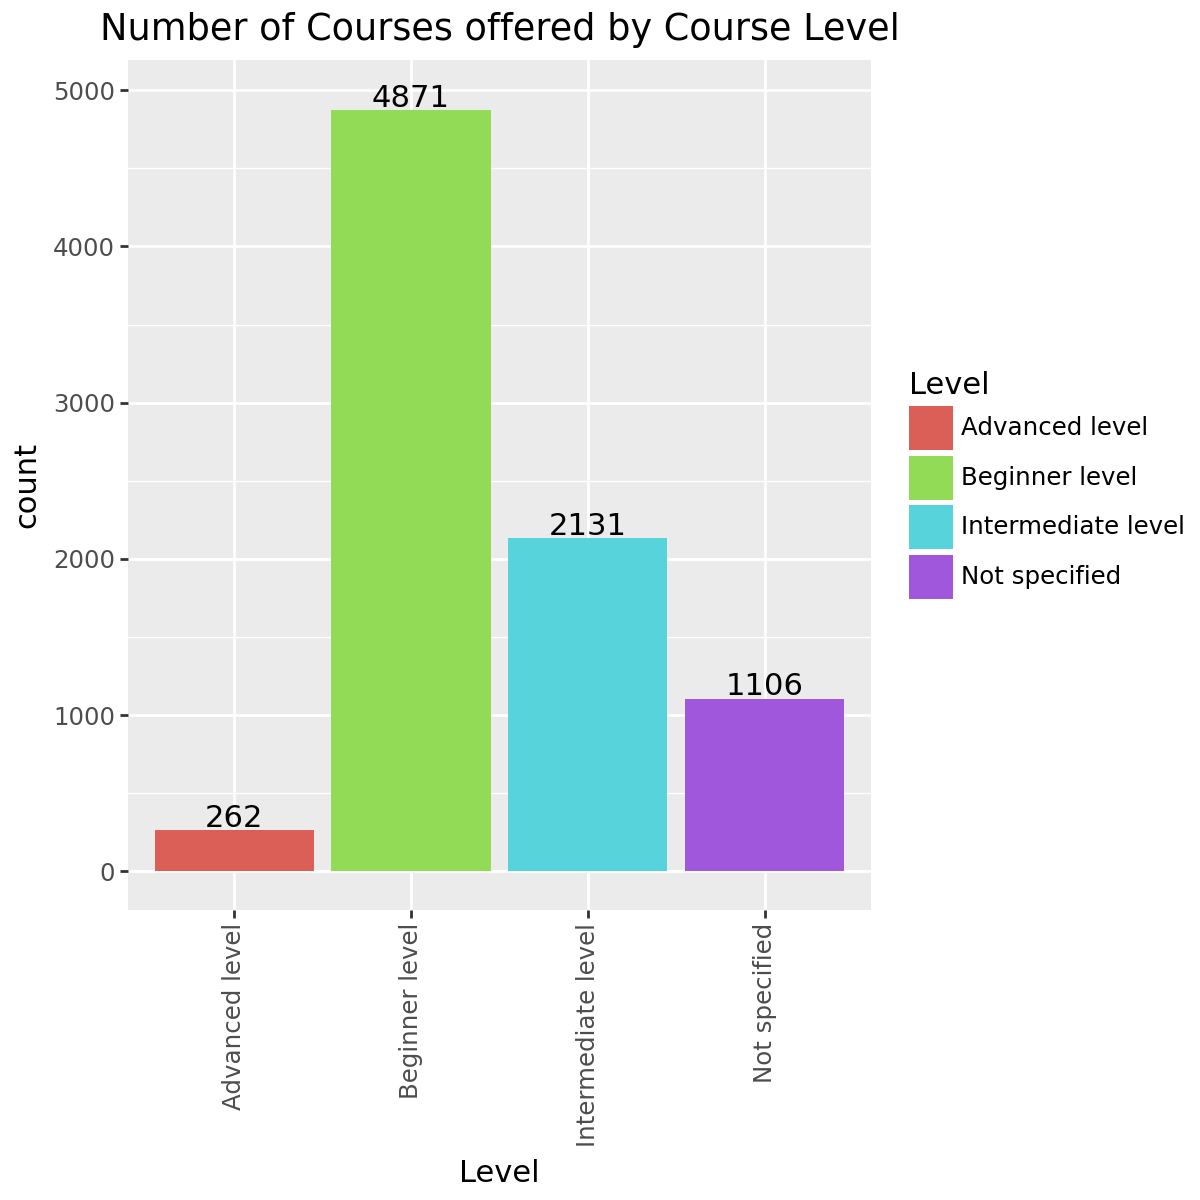

In [469]:
(
    ggplot(df1) 
    + aes(x='Level', fill='Level') 
    + geom_bar() 
    + theme(axis_text_x=element_text(rotation=90), figure_size=(6,6))
    + labs(title='Number of Courses offered by Course Level')
    + geom_text(aes(label=after_stat('count')),stat='count',nudge_y=75)
)


Finally when we evaluate the numerical values in the data, we don't see any evidence of correlation between the values

In [512]:
df1_simplified.loc[:,df1_simplified.dtypes != 'object'].corr()

,Rating,Duration to complete (Approx.),Number of Review
Rating,1.000000,0.137887,0.091059
Duration to complete (Approx.),0.137887,1.000000,0.175253
Number of Review,0.091059,0.175253,1.000000


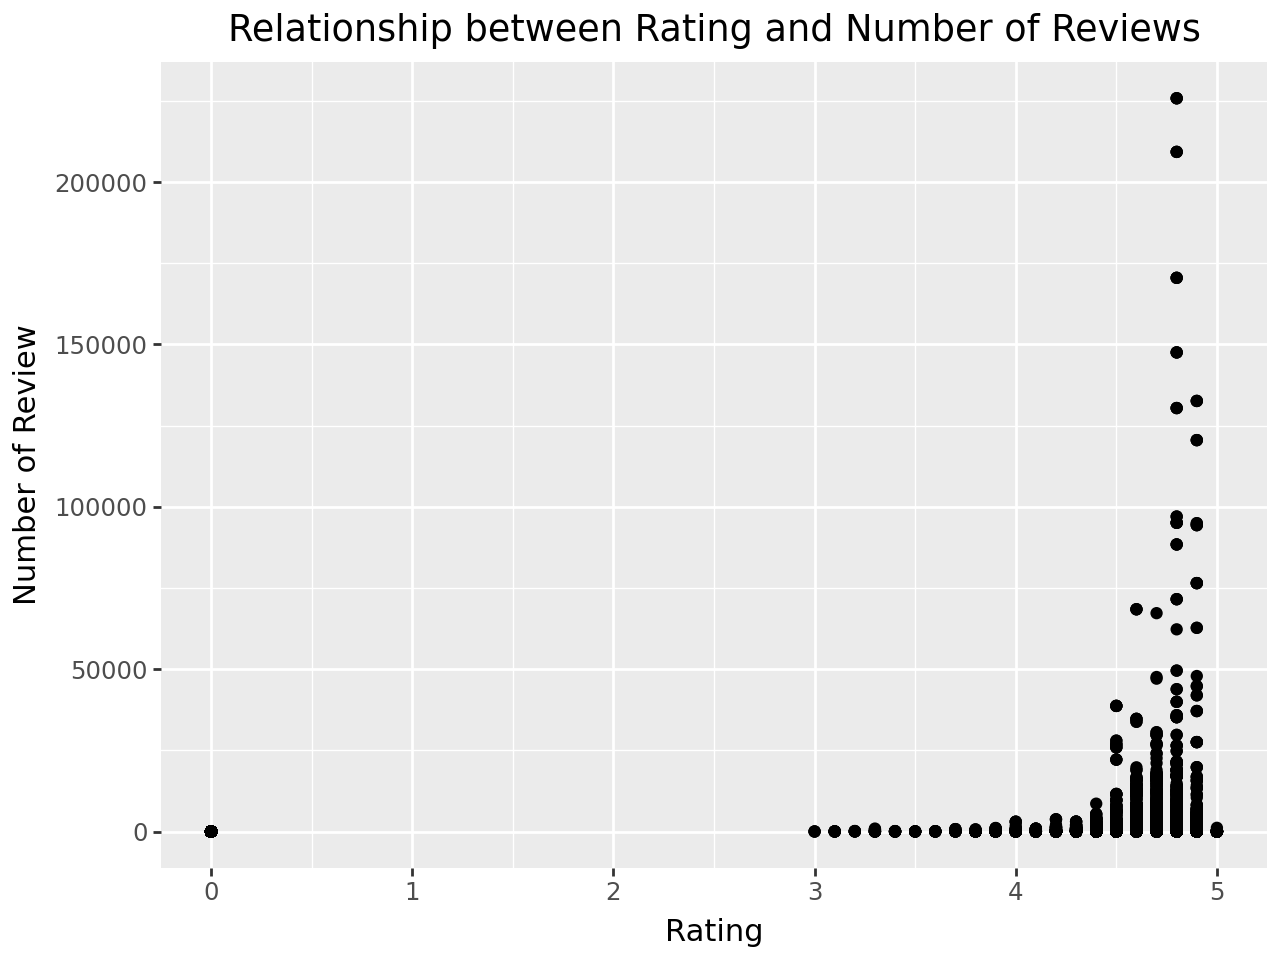

In [21]:
# Relationship between Rating and Number of Reviews

(
    ggplot(df1)
    + aes(x='Rating', y='Number of Review')
    + geom_point()
    + labs(title='Relationship between Rating and Number of Reviews')
)


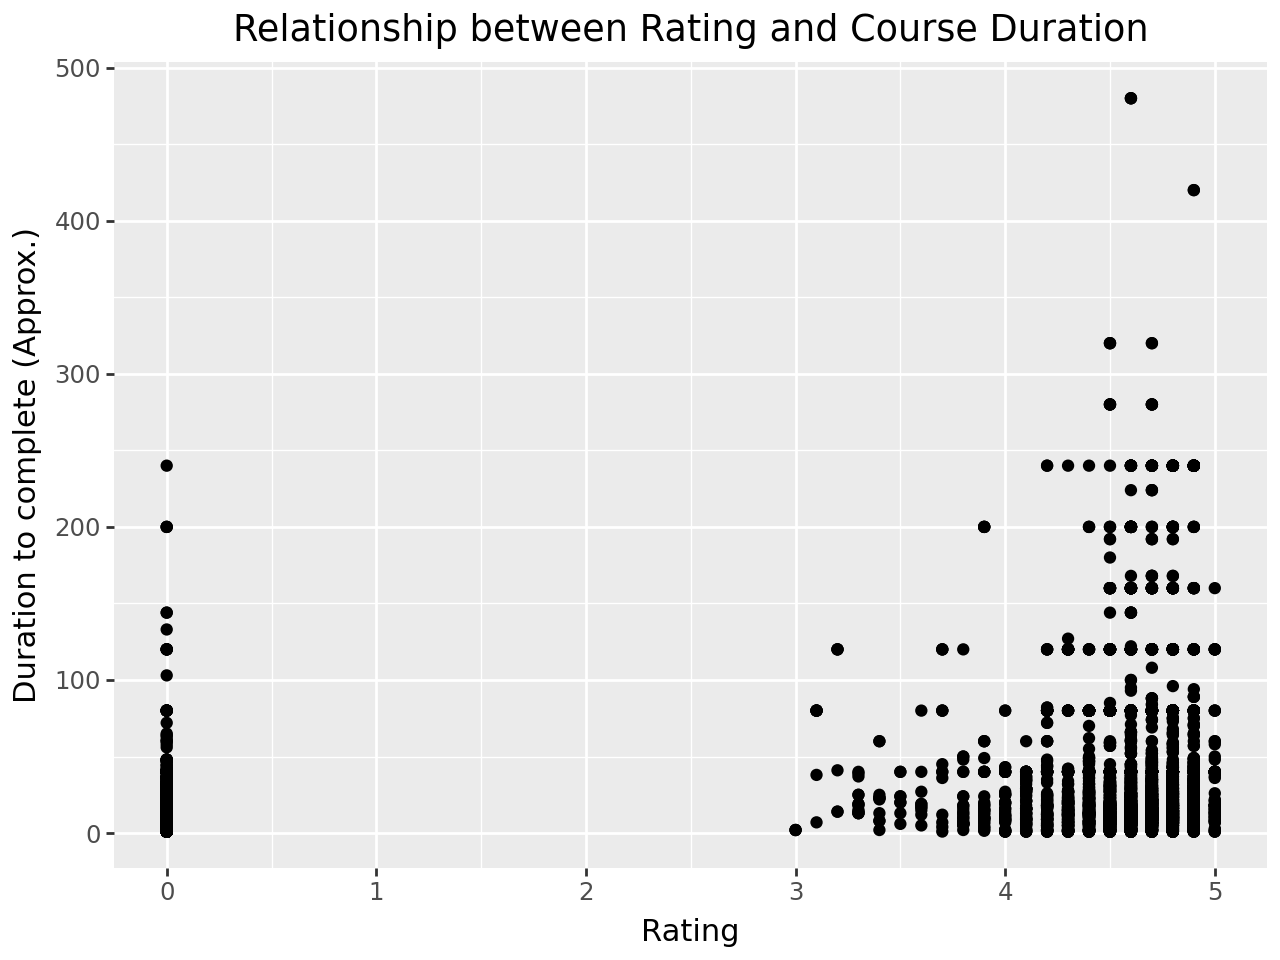

In [514]:
# Relationship between Rating and Course Duration

(
    ggplot(df1)
    + aes(x='Rating', y='Duration to complete (Approx.)')
    + geom_point()
    + labs(title='Relationship between Rating and Course Duration')
)


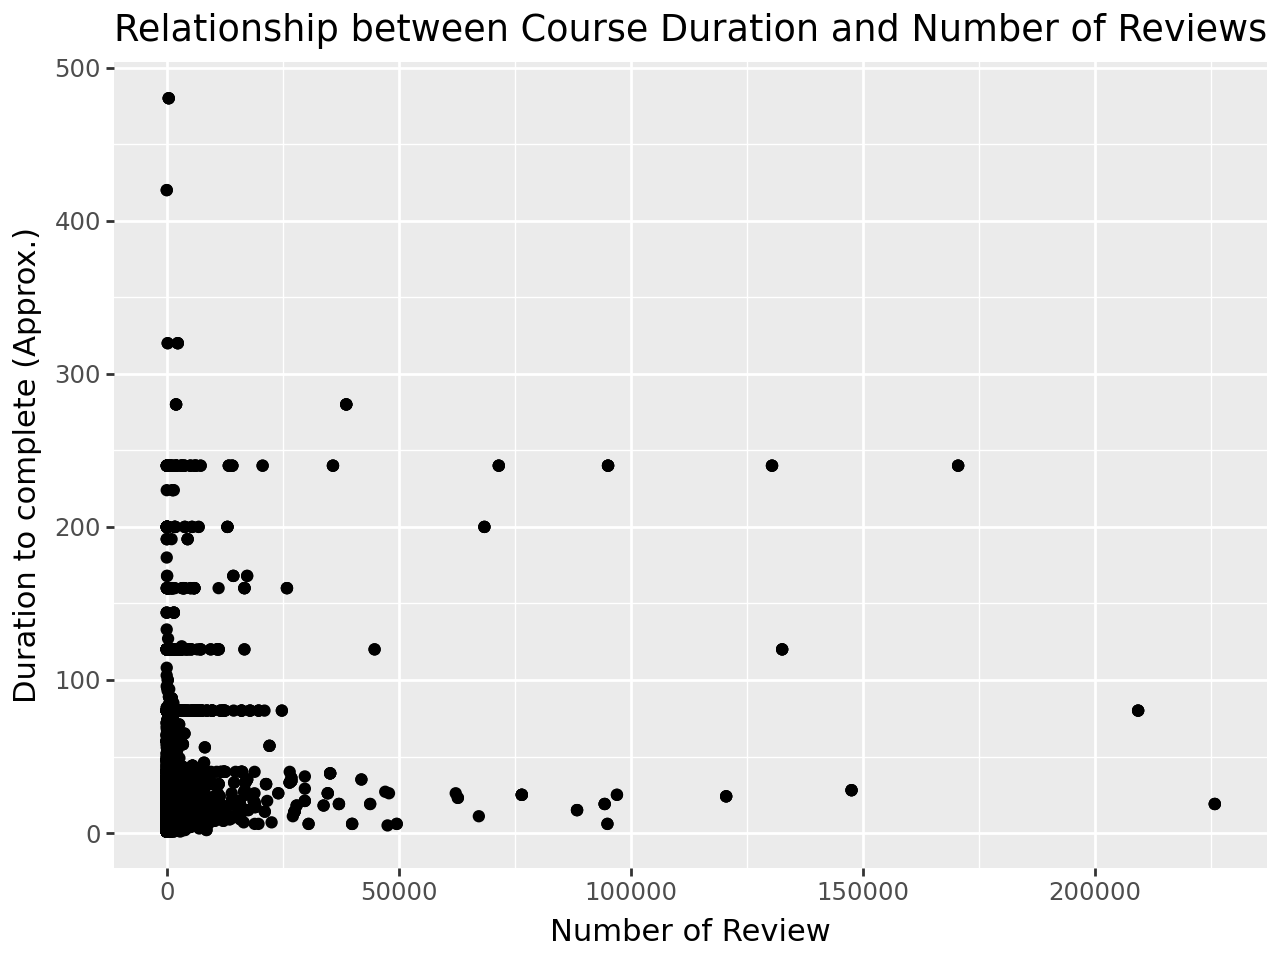

In [513]:
# Relationship between Rating and Course Duration

(
    ggplot(df1)
    + aes(x='Number of Review', y='Duration to complete (Approx.)')
    + geom_point()
    + labs(title='Relationship between Course Duration and Number of Reviews')
)


In [ ]:
pd.crosstab(df1['Keyword'],df1['Level'])

Level,Advanced level,Beginner level,Intermediate level,Not specified
Keyword,,,,
Arts and Humanities,1,278,77,120
Business,19,601,183,132
Computer Science,48,538,333,61
DataScience,50,550,300,64
Health,15,582,243,146
Information Technology,25,519,260,48
Math and Logic,12,253,146,69
Personal Development,11,616,156,153
Physical Science and Engineering,66,329,266,138


Based on the following table, we see that there may be some correlation between the two Course Category and the mean number of reviews provided.

In [525]:
df1_simplified.pivot_table(index=['Keyword'],values=['Rating', 'Number of Review','Duration to complete (Approx.)'], \
               aggfunc={'Number of Review':'mean', 'Rating':"mean",'Duration to complete (Approx.)':"mean"})

,Duration to complete (Approx.),Number of Review,Rating
Keyword,,,
Arts and Humanities,18.033613,845.256303,3.929622
Business,30.850267,1707.556150,4.138824
Computer Science,42.272959,3990.310204,4.471939
DataScience,48.160270,4228.391079,4.480913
Health,21.878296,1218.143002,3.806085
Information Technology,20.206964,1233.619718,3.566315
Math and Logic,36.788542,4719.470833,4.307292
Personal Development,21.109776,891.694444,3.714850
Physical Science and Engineering,22.076345,583.722153,3.614393


##### **Machine Learning**

To determine which ML algorithms to explore, we begin by defining a particular persona that we be reasonable for asking and answering questions of the data. For example, if I'm a program administrator and I'm interested in bringing in new courses, I may want to use an algorithm to predict the number of reviews that the course would generate. This can then be used to measure the actual number of received reviews and compare that against this benchmark. For this we can use a **Decision Tree** and **Linear Regression**

##### **Decision Tree**
We will use Decision Tree Regression to try and predict the number of reviews that we would expect a class to generate based on the course Level and course category. We used a regressor algorithm since we are looking to evaluate a numerical output variable. Furthermore, the choice to use a Decision Tree was based on the interpretability of the model and the simplicity of the model

In [547]:
df1_simplified_copy = df1_simplified.copy()

In [550]:
df1_simplified_copy['top_program'] = df1_simplified.apply(lambda x: 'yes' if x['Offered By'] is top_programs else 'no',axis=1)

In [572]:
X = df1_simplified_copy.loc[:,['Level','Keyword']]
y = df1_simplified_copy['Number of Review']

Our decision tree regressor requires the inputs be numerical values, so

In [573]:

X_encoded = pd.get_dummies(X,dtype='int')


In [574]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, test_size=0.33, random_state = 1211)

In [575]:
tree_clf = DecisionTreeRegressor()
tree_clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [576]:

tree_clf.score(X_test,y_test)

0.023735517757998204

In [577]:
tree_clf.get_depth()

12

The classifier model had an R-squared of 16% when we compare the predicted values of the test data with the actual values

##### **Linear Regression**
We will use Linear Regression to try and predict the number of reviews that we would expect a class to generate based on the course Level. Similar to the Decision Tree classifier, we selected the Linear Regression algorithm because we are looking for a numerical output. However, given that our exploratory analysis suggested that there isn't any obvious linear relationship between the features in the data, we don't expect this model to perform well. 

In [578]:
lm_clf = LinearRegression()

In [579]:
lm_clf.fit(X_train, y_train)

LinearRegression()

In [580]:
y_pred = lm_clf.predict(X_test)

In [581]:
len(y_pred)

2763

In [582]:
lm_clf.intercept_

2188372064744337.8

We see that the Linear Regression model was not a great predictor neither, although it did have the same R-squared value as the Decision Tree Classifier. I think that in this case, we could probably improve the accuracy of the predictions by using a model that is not based on a linear relationship or by doing more future engineering.

In [583]:
lm_clf.score(X_test,y_test)

0.021913645729907505

### **C. Loan Default Prediction**

This dataset provides information on loans that were issued and provides features on the loan and the individual who the loan was issued to, and then provides a label for whether or not the loan was defaulted on

This dataset has 68k rows and 35 features. Already, due to the expanded number of features, it is difficult to make any initial inferences just based on looking at the dataframe. This is an example of how a larger dataset can change the approach to how to think about the data and how to approach the data. I would imagine that if there were more features, this could become an even larger task at the onset.

In [ ]:
df2.shape

(67463, 35)

Just based on my initial view of the data, I am led to question whether or not this dataset is not rife with errors. There are several features in which the values in the field do not appear to make see given the column labels. For example, the "Collection Recovery Fee" appears to be a decimal based value, which is more akin to what we would expect to see for a rate and not an actual total fee. Additionally, the "Emplpyment Duration" column has categorical features, that relate to the home ownership status. 

If we assume the data itself is correct and that the column labels are just mislabeled in some instances, then it can allow us to apply a machine Learning algorithm to our data. However, this can greatly impact our ability to do effective exploratory analysis and to apply domain knowledge to this process - since we would be able to know which of the fields are best aligned to their label in order to establish the expected values for those fields. Additionally, this will impact our ability to interpret our model - since we won't have an accurate representation of the field values.

In [584]:
df2.head(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
5,50509046,34631,30203,8635.931613,36,BAT4694572,17.246986,B,G5,RENT,98957.47561,Not Verified,n,Credit card refinancing,7.914333,3,2,16,0,2277,51.564476,20,w,464.818124,0.088584,5.043575,0.581688,0,INDIVIDUAL,32,0,42,51252,27480,0
6,32737431,30844,19773,15777.511830,59,BAT4808022,10.731432,C,C5,RENT,102391.82430,Verified,n,Home improvement,15.083911,0,0,11,0,14501,46.808804,37,w,525.738109,0.083528,3.167937,0.553076,0,INDIVIDUAL,71,0,3388,42069,31068,0
7,63151650,20744,10609,7645.014802,58,BAT2558388,13.993688,A,A5,OWN,61723.52014,Not Verified,n,Debt consolidation,29.829715,0,0,14,0,13067,23.936624,33,w,1350.245212,0.044965,0.098448,0.047589,0,INDIVIDUAL,87,0,48,184909,43303,0
8,4279662,9299,11238,13429.456610,59,BAT5341619,11.178457,G,C2,MORTGAGE,63205.09072,Verified,n,Credit card refinancing,26.244710,0,0,6,0,549,15.947386,17,w,4140.198978,0.017106,0.530214,0.216985,0,INDIVIDUAL,144,0,26,68126,7482,0
9,4431034,19232,8962,7004.097481,58,BAT2078974,5.520413,C,B5,RENT,42015.46586,Source Verified,n,Credit card refinancing,10.048549,1,0,11,0,1361,35.073345,30,f,2149.666963,0.008338,2.912215,0.886864,0,INDIVIDUAL,9,0,35,71650,14871,0


When looking at the data by column name and data type, we see that indeed there are some fields that are most likely mislabeled, based on the number of unique values that are in that field relative to what we would expect based on domain knowledge, and or based on the data type for that field. For example, we see that the "Home Ownership" field is represented as a float, and has as many unique values as there are rows. This is going to be an error.

For the remainder of this analysis, I'm not going to try and address this misclassification issue; but if this were a project for a client or for work this would definitely be an issue that would need to be resolved before moving forward.

In [606]:
df2_details = [{'column':column,'num_unique':len(df2.loc[:,column].unique()),'dtype':df2[column].dtype} for column in df2.columns]
pd.DataFrame(df2_details).sort_values(by='dtype').reset_index(drop=True)


,column,num_unique,dtype
0,ID,67463,int64
1,Total Current Balance,60901,int64
2,Total Collection Amount,2193,int64
3,Accounts Delinquent,1,int64
4,Last week Pay,162,int64
5,Collection 12 months Medical,2,int64
6,Total Accounts,69,int64
7,Revolving Balance,20582,int64
8,Public Record,5,int64
9,Total Revolving Credit Limit,37708,int64


#### **Exploratory Analysis**

Some questions of interest in the exploration of the data include:
- What are the data values and counts for some of the different categorical variables?
- Are there any correlations between our Loan Status field and any of our other variables?
- What is the distribution of the numerical fields in our data?



In [ ]:
df2.head(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
5,50509046,34631,30203,8635.931613,36,BAT4694572,17.246986,B,G5,RENT,98957.47561,Not Verified,n,Credit card refinancing,7.914333,3,2,16,0,2277,51.564476,20,w,464.818124,0.088584,5.043575,0.581688,0,INDIVIDUAL,32,0,42,51252,27480,0
6,32737431,30844,19773,15777.511830,59,BAT4808022,10.731432,C,C5,RENT,102391.82430,Verified,n,Home improvement,15.083911,0,0,11,0,14501,46.808804,37,w,525.738109,0.083528,3.167937,0.553076,0,INDIVIDUAL,71,0,3388,42069,31068,0
7,63151650,20744,10609,7645.014802,58,BAT2558388,13.993688,A,A5,OWN,61723.52014,Not Verified,n,Debt consolidation,29.829715,0,0,14,0,13067,23.936624,33,w,1350.245212,0.044965,0.098448,0.047589,0,INDIVIDUAL,87,0,48,184909,43303,0
8,4279662,9299,11238,13429.456610,59,BAT5341619,11.178457,G,C2,MORTGAGE,63205.09072,Verified,n,Credit card refinancing,26.244710,0,0,6,0,549,15.947386,17,w,4140.198978,0.017106,0.530214,0.216985,0,INDIVIDUAL,144,0,26,68126,7482,0
9,4431034,19232,8962,7004.097481,58,BAT2078974,5.520413,C,B5,RENT,42015.46586,Source Verified,n,Credit card refinancing,10.048549,1,0,11,0,1361,35.073345,30,f,2149.666963,0.008338,2.912215,0.886864,0,INDIVIDUAL,9,0,35,71650,14871,0


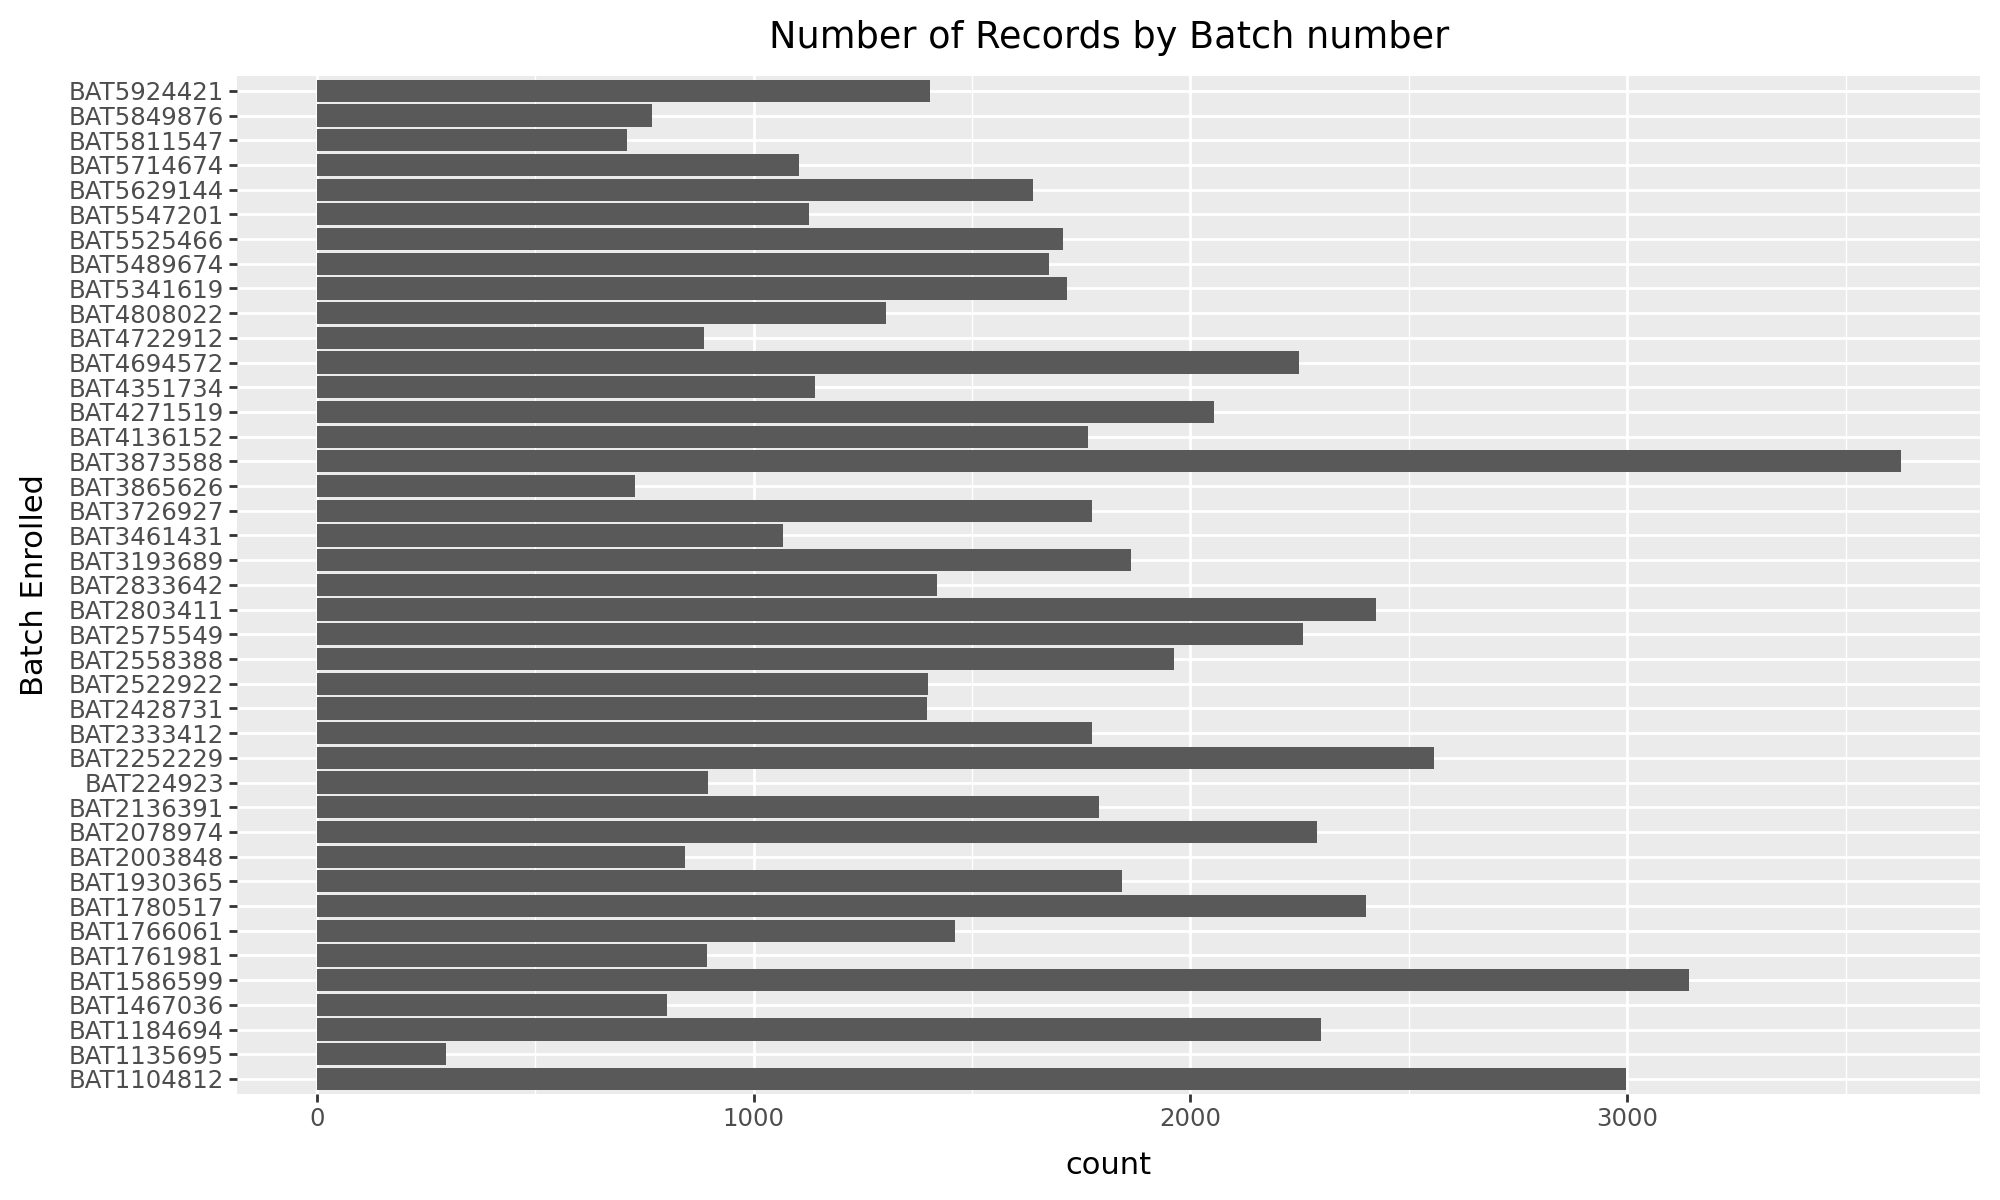

In [613]:
(
    ggplot(df2)
    + aes(x='Batch Enrolled')
    + geom_bar()
    + coord_flip()
    + theme(figure_size=(10,6))
    + labs(title='Number of Records by Batch number')
)

Assuming that the grading scale is such that an A grade is the highest quality and a G grade is the lowest quality, then we can interpret the distribution of loans by grade as suggesting that this institution has a somewhat generous loan process. By which they grant loans to individuals who aren't necessarily the best in terms of their grade.

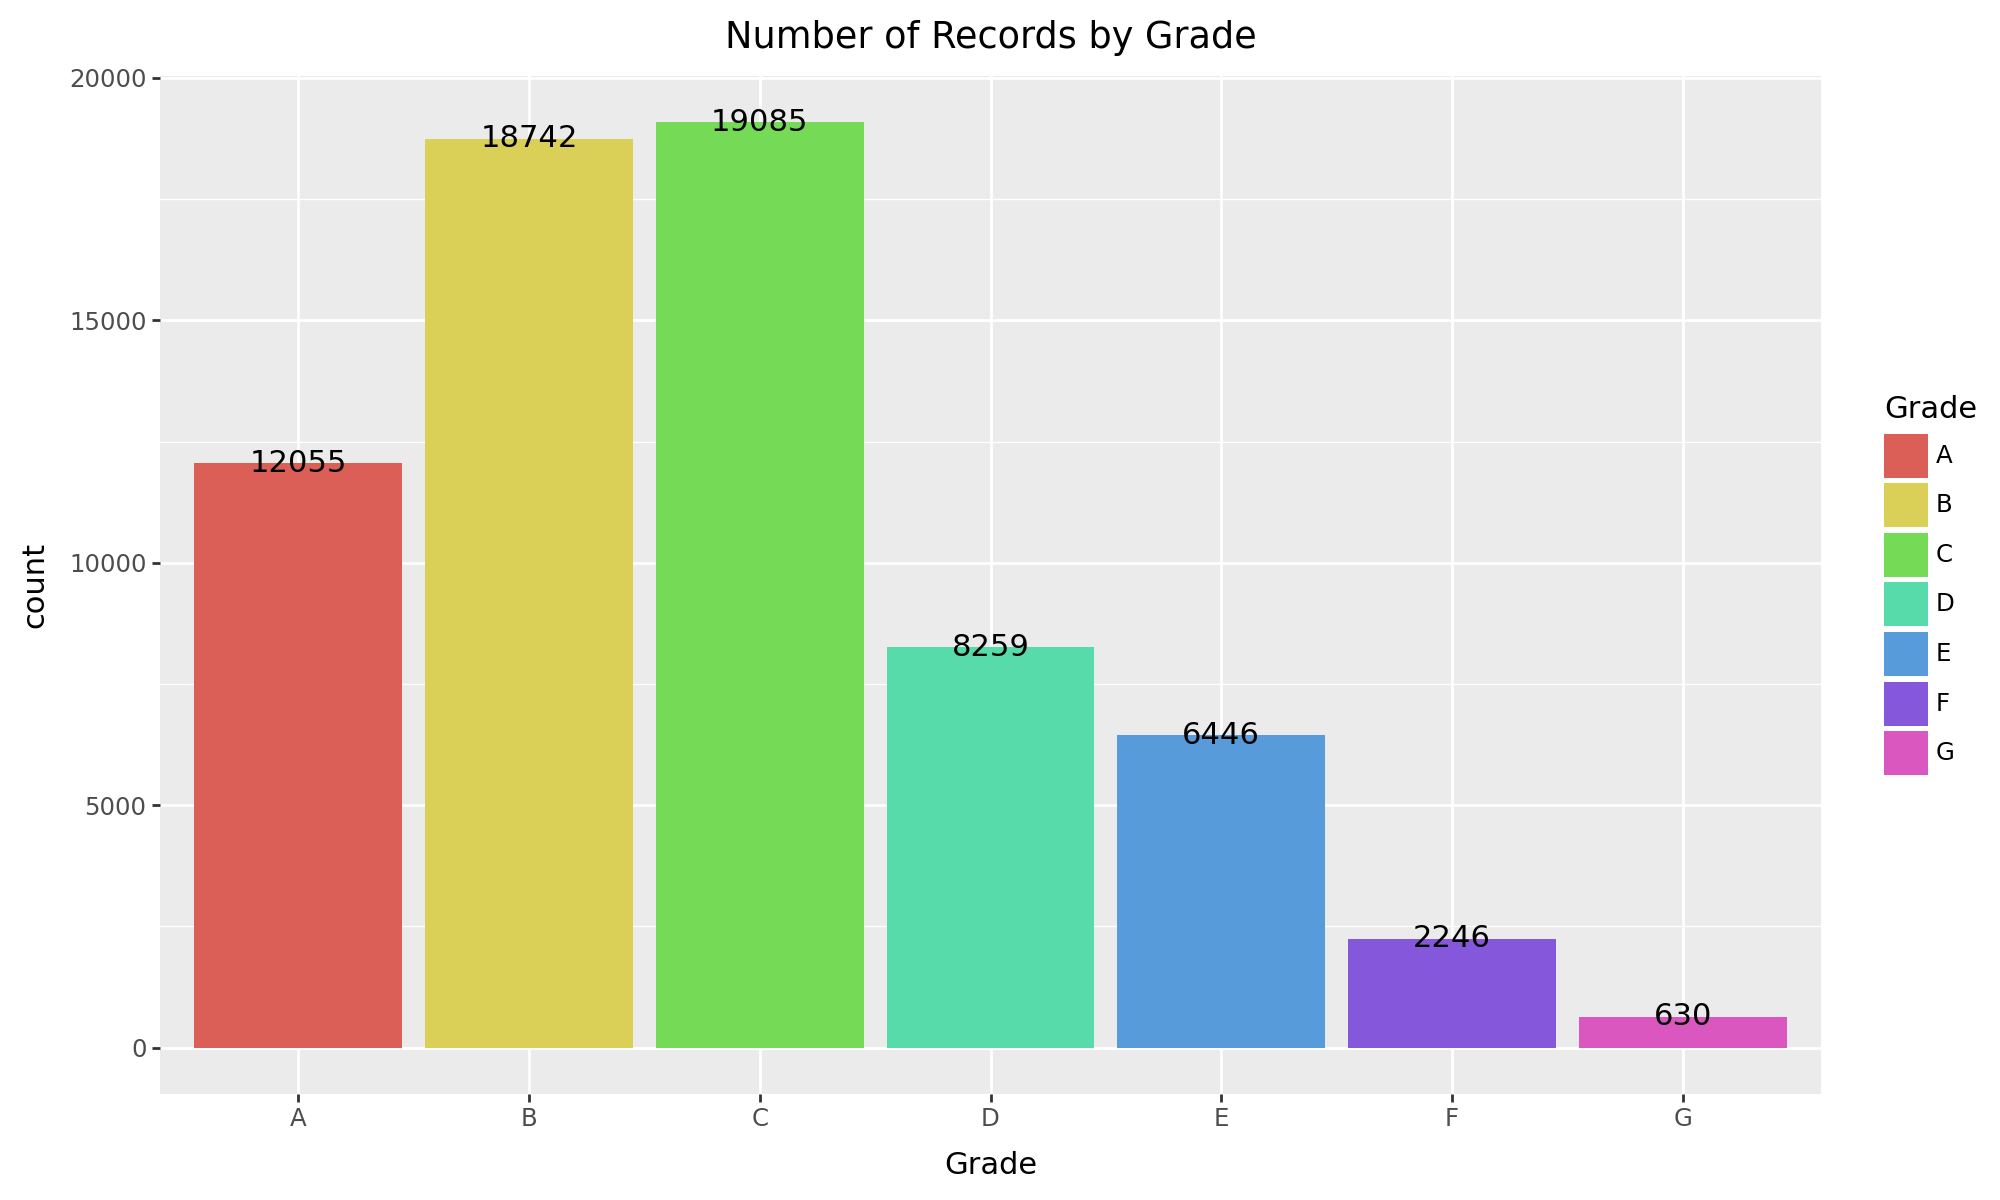

In [641]:
(
    ggplot(df2)
    + aes(x='Grade', fill='Grade')
    + geom_bar()
    + theme(figure_size=(10,6))
    + geom_text(aes(label=after_stat('count')),stat='count')
    + labs(title='Number of Records by Grade')
)

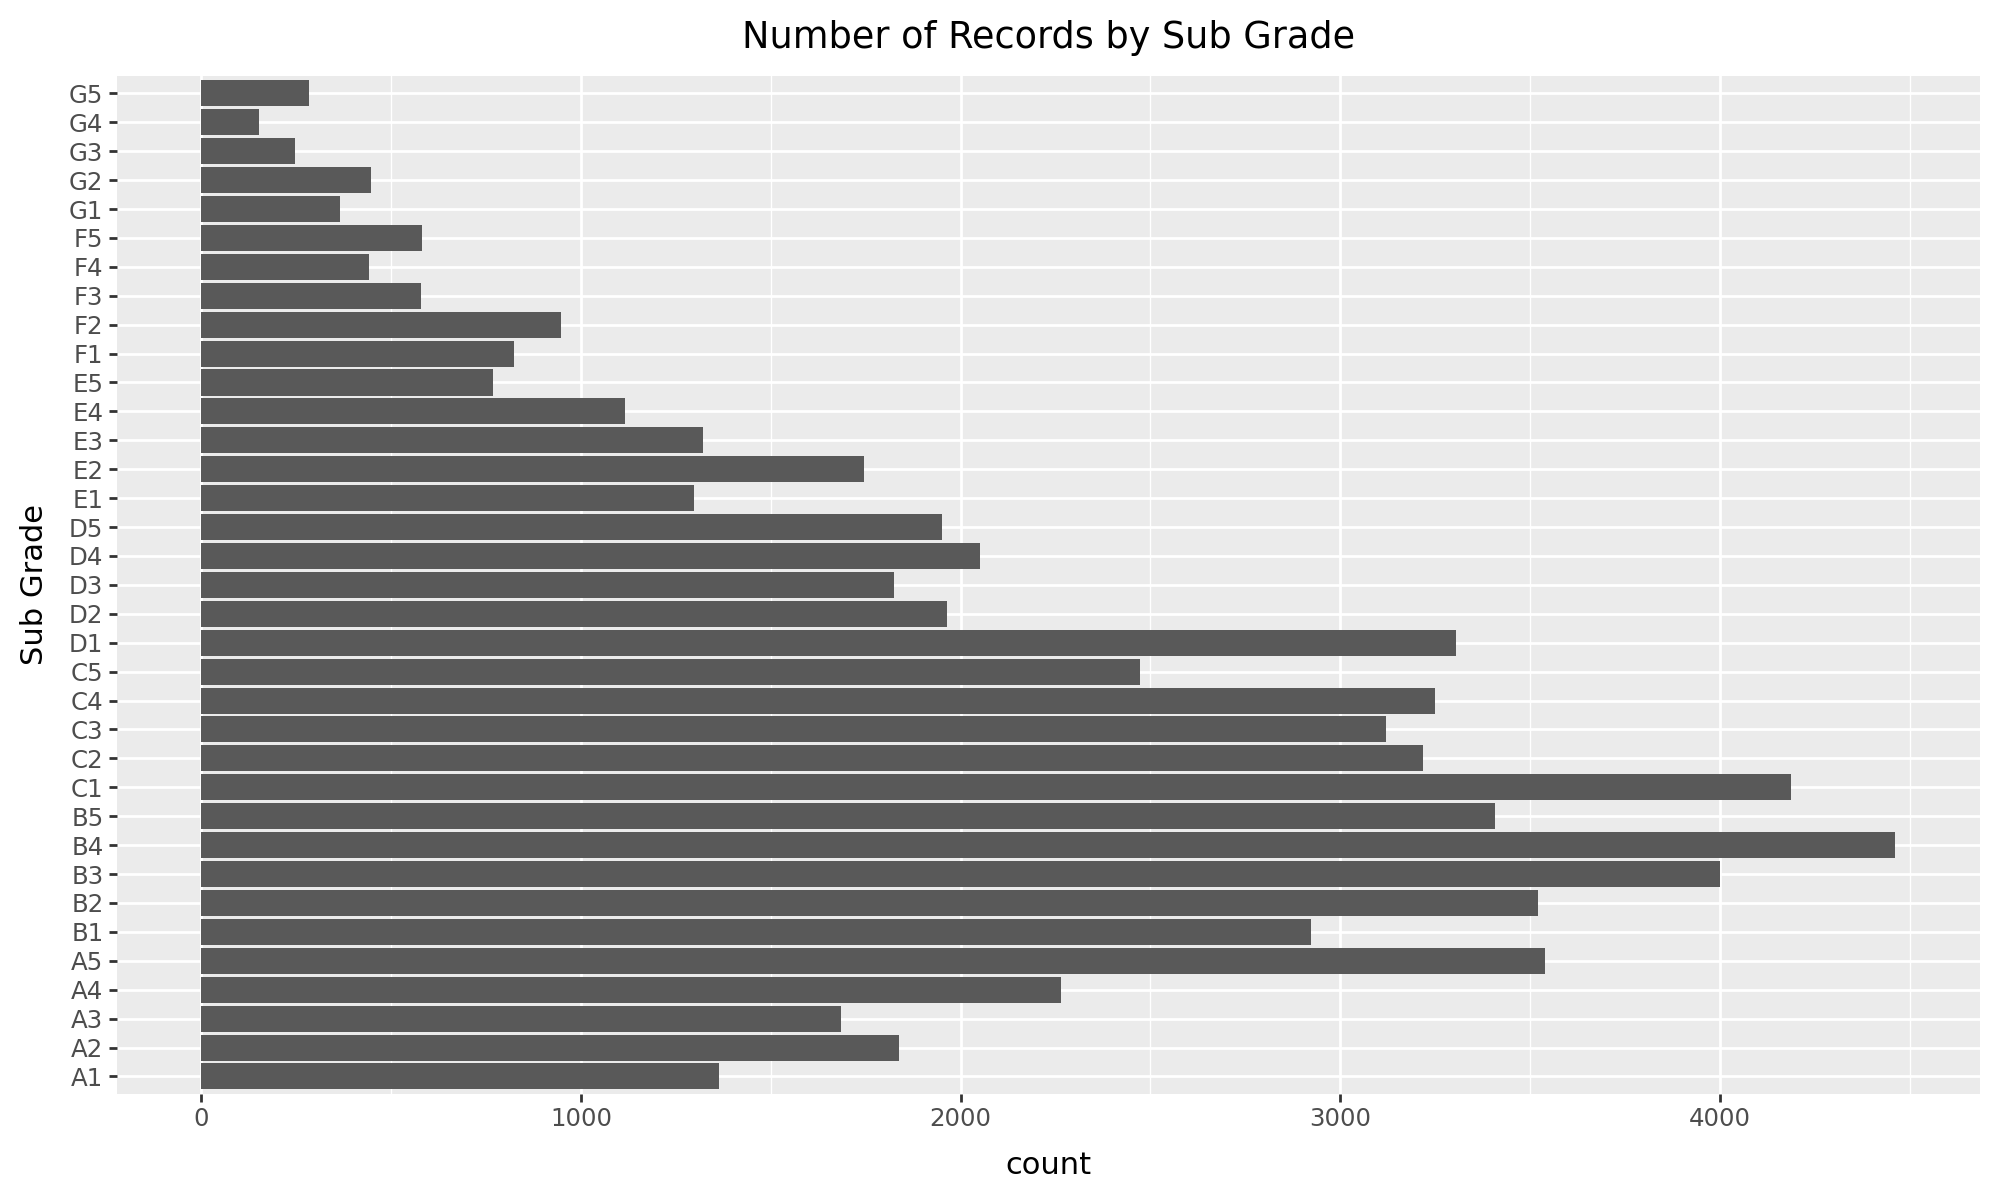

In [621]:
(
    ggplot(df2)
    + aes(x='Sub Grade')
    + geom_bar()
    + coord_flip()
    + theme(figure_size=(10,6))
    + labs(title='Number of Records by Sub Grade')
)

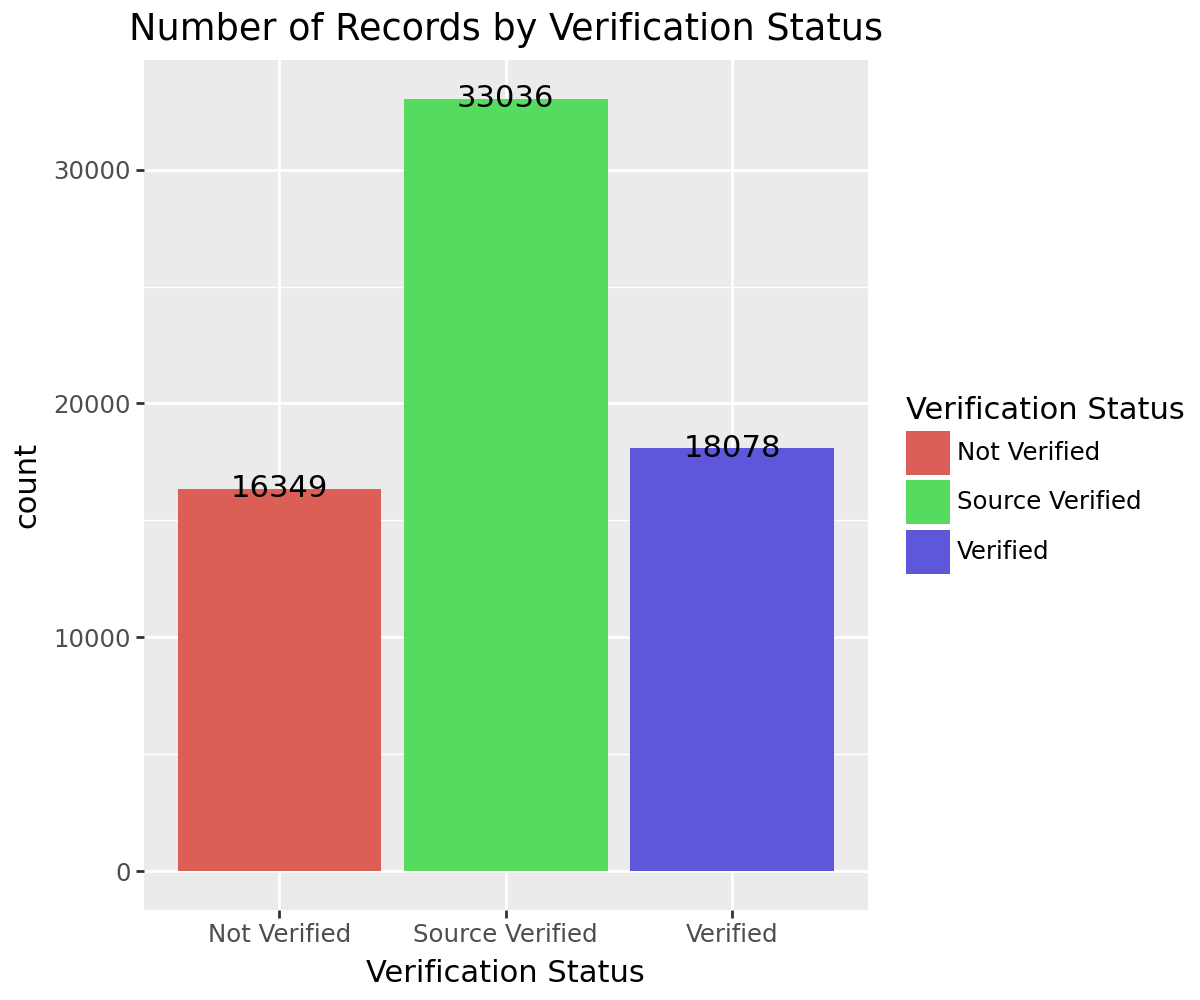

In [640]:
(
    ggplot(df2)
    + aes(x='Verification Status',fill='Verification Status')
    + geom_bar()
    + theme(figure_size=(6,5))
    + geom_text(aes(label=after_stat('count')),stat='count')
    + labs(title='Number of Records by Verification Status')
)

We see that the data is mostly populated by Individual applications

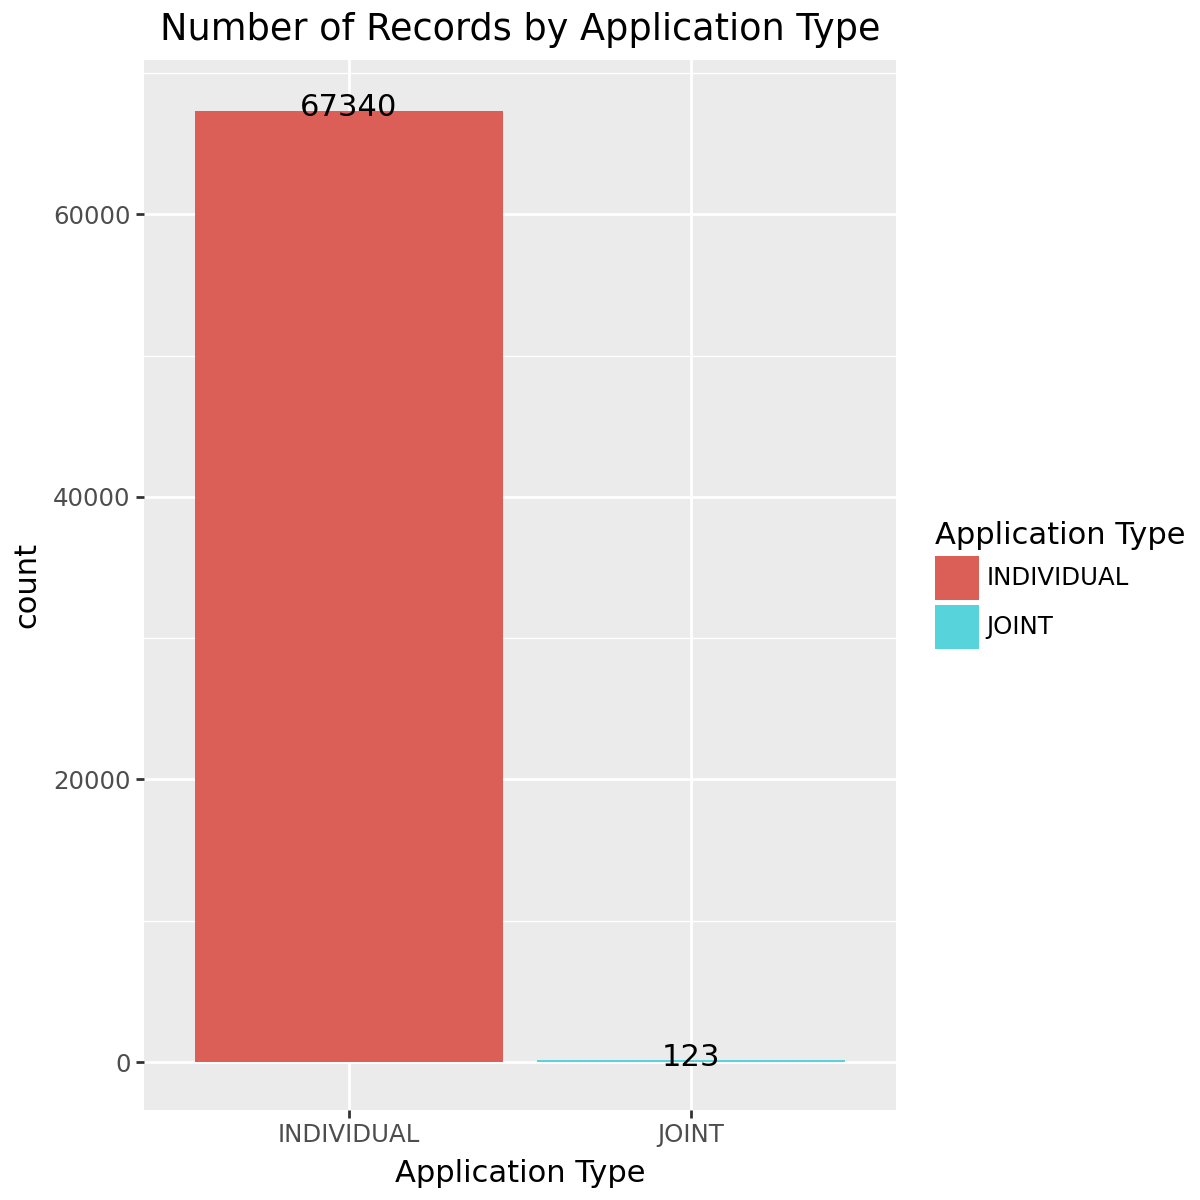

In [639]:
(
    ggplot(df2)
    + aes(x='Application Type',fill='Application Type')
    + geom_bar()
    + theme(figure_size=(6,6))
    + geom_text(aes(label=after_stat('count')), stat='count',nudge_y=200)
    + labs(title='Number of Records by Application Type')
)

#### **Machine Learning**

Our machine learning modeling will be focused on seeing if we an predict the loan status based on a few fields within the data. Given the issues we identified with our reliability of the data labels, we will focus on a dataset that only includes a few of the fields that we are most confident in.

Since we want to predict a specific label for our data, we will use Logistic Regression and KNN as the two supervised learning methods for classification.

In [647]:
df2.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [648]:
pd.DataFrame(df2.columns).reset_index(drop=True).rename(columns={0:'Column'})
keep_columns = [1,7,8,9,14,10,15,16,17,30,31,32,33,34 ]

In [650]:
df2_simple = df2.iloc[:,keep_columns]

In [651]:
df2_simple.head()

,Loan Amount,Grade,Sub Grade,Employment Duration,Debit to Income,Home Ownership,Delinquency - two years,Inquires - six months,Open Account,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,B,C4,MORTGAGE,16.284758,176346.62670,1,0,13,0,31,311301,6619,0
1,3609,C,D3,RENT,15.412409,39833.92100,0,0,12,0,53,182610,20885,0
2,28276,F,D4,MORTGAGE,28.137619,91506.69105,0,0,14,0,34,89801,26155,0
3,11170,C,C3,MORTGAGE,18.043730,108286.57590,1,0,7,0,40,9189,60214,0
4,16890,C,D4,MORTGAGE,17.209886,44234.82545,1,3,13,0,430,126029,22579,0


We will use Loan Status as the target variable for our classification. However, since we see that the data is highly imbalanced, we will start by rebalancing the data, by upsampling to generate more cases of the data with Loan Status equal to 1 (representing that the Loan resulted in a default)

In [652]:
df2_simple['Loan Status'].value_counts()

Loan Status
0    61222
1     6241
Name: count, dtype: int64

In [653]:
from sklearn.utils import resample

In [654]:
df_majority = df2_simple[df2_simple['Loan Status'] == 0]
df_minority = df2_simple[df2_simple['Loan Status'] == 1]

In [656]:
df_minority_upsampled = resample(df_minority, replace=True,n_samples=len(df_majority), random_state=1211)

In [659]:
df2_upsampled = pd.concat([df_majority, df_minority_upsampled])

Now we have a more balanced dataset

In [660]:
df2_upsampled['Loan Status'].value_counts()

Loan Status
0    61222
1    61222
Name: count, dtype: int64

In [675]:
X = df2_upsampled.iloc[:,:-1]
y = df2_upsampled['Loan Status']

In [672]:
np.array(y)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [665]:
X_encoded = pd.get_dummies(X,dtype=int,drop_first=True)

In [676]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.33, random_state=1211)

##### Classification
For the classification model, I decided to use a Logistic Regression and KNN algorithm. 

1. Logistic Regression

In [677]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

This model generated an R-Squared value of 51%

In [678]:
clf.score(X_test,y_test)

0.5108273318979385

2. K-Nearest Neighbors

In [679]:
clf = KNeighborsClassifier(n_neighbors=5)

In [680]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

Here we generated an R-Squared score that was 82%

In [681]:
clf.score(X_test, y_test)

0.8172593857499938

### Conclusion

For the Coursera dataset, we found that it was a relatively small dataset - 8k rows and 13 features. I notice that based on the size of the initial dataset, it was relatively simple for me to begin my exploratory work just based on what I was able to see with the naked eye. It was relatively easy to identify the data types for each of the fields in the data. Although I still needed to do a formal exploratory process, this was an important distinction between this dataset and the larger Loan Default dataset that I used for my second dataset.

For the Loan Default dataset, there were 68K rows and 35 feature variables. While it wasn’t a significantly larger dataset, there was a noticeable difference in terms of the analysis approach given that there were nearly 3x more feature variables. This was very instructive in that I was able to recognize that the more feature variables there are, the more work is required to conduct an exploratory analysis. 

For the Coursera dataset, I decided to build a model that predicts a numerical value. Given that, I went with a Decision Tree Regressor and a Linear Regression model. Given the fact that I was looking for a numerical target variable, it made sense for me to use these models. However, I also could’ve used a KNN model and determined the numerical output based on the average value for the data within the neighborhood. One of the cons of using the Linear Regression model in this case was that it was relatively evident through the exploratory analysis process that there was likely to not be a linear relationship between the features and the output variable; thus a model that was less reliant on a linear relationship - such as a SVM model - may have made more sense.

For the Loan Default dataset, the target variable was a 0 or 1 variable representing whether or not the loan defaulted. For this, the goal was to develop a model that could correctly label data based on their features. For this, I started by creating a more simplified data frame that only included features that I felt would be relevant for the model. Some of these variables were categorical and thus they needed to be numerically encoded so that we only had numerical features. Also, the initial dataset was significantly imbalanced with respect to our target variable; and thus I decided to upsample the minority class before using the data in my training model.

Given the fact that I was looking to predict a categorical variable, I decided to use Logistic Regression and K-Nearest Neighbors for making these predictions. Both of these algorithms are appropriate algorithms to use when looking to predict a categorical variable. 

For the Loan Default prediction, the KNN model with n=5 neighbors, performed much better than the Logistic Regression and generated an R2 value of 87%. I think that this model performed relatively well, but I would want to test out other supervised classification models to see if I could generate a more accurate prediction model.

Finally, it is my conclusion that the size of the dataset can have a significant impact on the analysis process as well as on the model selection. If there are many more rows (in the hundreds of thousands or above) this could require significantly more computing resources. Also, the number of features could require us to do some feature engineering to reduce the number of features. This could require us to use PCA for example.
